Raw data loaded successfully.

--- Data processing complete. ---
Shape of processed data: (850, 23)

Processed data saved to '../data/processed/processed_data.csv'
Transformation artifacts (target map and clusterer) saved to '../models/'

Visualizing geographical clusters...


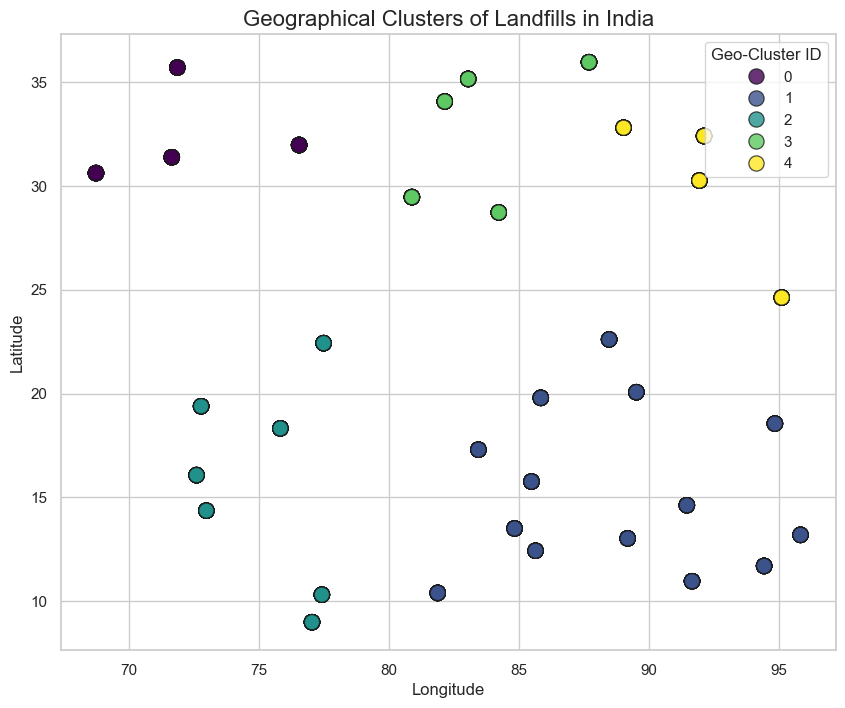

Validating the effectiveness of Target Encoding...


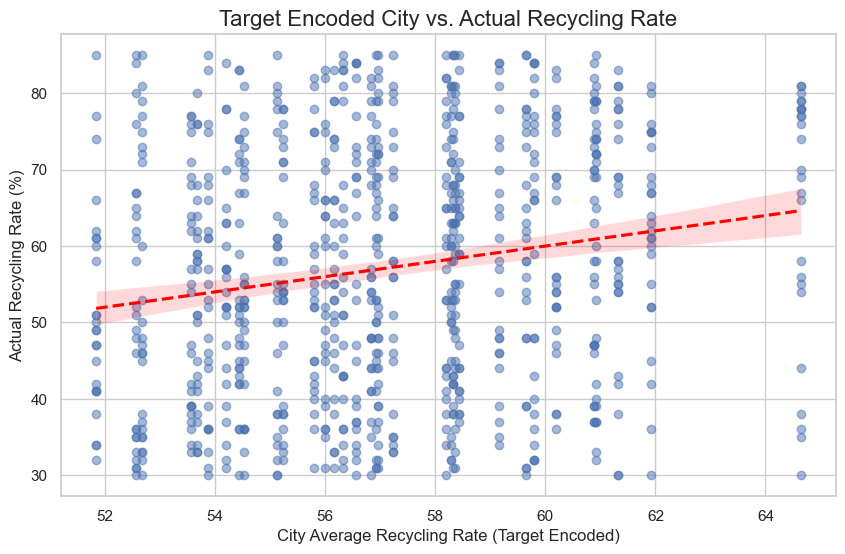

In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust the path to import from the 'src' directory.
# This might require setting up your project environment (e.g., PYTHONPATH) or using a different import method.
import sys
sys.path.append('../')
from src.data.preprocess import feature_engineering

# --- 1. Load Raw Data ---
# Load the dataset provided for the hackathon.
try:
    df_raw = pd.read_csv('../data/raw/Waste_Management_and_Recycling_India.csv')
    print("Raw data loaded successfully.")
except FileNotFoundError:
    print("Error: The raw data file was not found. Make sure it's in the 'data/raw' directory.")
    exit()

# --- 2. Apply the Advanced Feature Engineering Pipeline ---
# Use the function to process the training data. This will create and return the fitted transformers.
df_processed, city_target_map, geo_clusterer = feature_engineering(df_raw.copy(), is_training=True)

print("\n--- Data processing complete. ---")
print("Shape of processed data:", df_processed.shape)

# --- 3. Save Processed Data and Transformation Artifacts ---
# Save the clean, feature-rich dataset that will be used for model training.
df_processed.to_csv('../data/processed/processed_data.csv', index=False)
print("\nProcessed data saved to '../data/processed/processed_data.csv'")

# Save the fitted target map and clusterer. These are ESSENTIAL for making predictions on new data later.
joblib.dump(city_target_map, '../models/city_target_map.pkl')
joblib.dump(geo_clusterer, '../models/geo_clusterer.pkl')
print("Transformation artifacts (target map and clusterer) saved to '../models/'")


# --- 4. Visualize and Validate the New Engineered Features ---
# Visualizing our new features helps confirm they've been created correctly and are meaningful.

# Set plot style for better aesthetics
sns.set_theme(style="whitegrid")

# a) Visualize the Geographical Clusters
print("\nVisualizing geographical clusters...")
# We need the original lat/long for plotting, so we re-extract them here.
lat_long_plot = df_raw['Landfill Location (Lat, Long)'].str.split(', ', expand=True).astype(float)
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(
    x=lat_long_plot[1],  # Longitude
    y=lat_long_plot[0],  # Latitude
    hue=geo_clusterer.labels_,  # Use the cluster assignments from our fitted model
    palette='viridis',
    s=120,
    alpha=0.8,
    edgecolor='k'
)
scatter.set_title('Geographical Clusters of Landfills in India', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Geo-Cluster ID')
plt.show()
# This plot should show distinct, color-coded groups of cities, confirming our clustering worked.

# b) Validate the Target Encoded City Feature
print("Validating the effectiveness of Target Encoding...")
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_processed,
    x='City_Target_Encoded',
    y='Recycling Rate (%)',
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red', 'linestyle':'--'}
).set_title('Target Encoded City vs. Actual Recycling Rate', fontsize=16)
plt.xlabel('City Average Recycling Rate (Target Encoded)', fontsize=12)
plt.ylabel('Actual Recycling Rate (%)', fontsize=12)
plt.show()
# A strong positive linear trend here confirms that the target encoding has successfully captured
# the predictive relationship between a city and its typical recycling rate.


In [2]:
df

NameError: name 'df' is not defined